In [1]:
import pandas as pd
import numpy as np

In [2]:
import sqlite3

In [45]:
import matplotlib.pyplot as plt

In [3]:
database_name = 'z:/wilding-mcbride/processing/UPS2_MS1_MS2_ratio_experiment_20180621_2xMS2/UPS2_MS1_MS2_ratio_experiment_20180621_2xMS2-features-886-1770.sqlite'

In [9]:
feature_id_lower = 886
feature_id_upper = 1770

In [10]:
source_conn = sqlite3.connect(database_name)
features_df = pd.read_sql_query("select feature_id,base_peak_id from feature_base_peaks where feature_id >= {} and feature_id <= {} order by feature_id ASC;".format(feature_id_lower, feature_id_upper), source_conn)
source_conn.close()

In [78]:
feature_id = 886
base_peak_id = 1
ms2_peak_id = 10000

In [79]:
# load the feature's base peak points
source_conn = sqlite3.connect(database_name)
feature_base_peak_points_df = pd.read_sql_query("""select point_id,mz,scan,intensity from summed_ms1_regions where feature_id={} and peak_id={} order by scan ASC;""".format(feature_id,base_peak_id), source_conn)
source_conn.close()

In [80]:
# Load the ms2 peaks for this feature
source_conn = sqlite3.connect(database_name)
ms2_peaks_df = pd.read_sql_query("select peak_id,intensity from ms2_peaks where feature_id={} order by peak_id ASC;".format(feature_id), source_conn)
source_conn.close()

In [81]:
len(ms2_peaks_df)

16463

In [82]:
# Load the ms2 peak points for this feature
source_conn = sqlite3.connect(database_name)
ms2_peak_points_df = pd.read_sql_query("select peak_id,point_id,mz,scan,intensity from summed_ms2_regions where feature_id={} order by peak_id,scan ASC;".format(feature_id), source_conn)
source_conn.close()

In [83]:
base_peak_df = feature_base_peak_points_df[['scan','intensity']]

In [84]:
ms2_peak_df = ms2_peak_points_df.loc[(ms2_peak_points_df.peak_id==ms2_peak_id),['scan','intensity']]
combined_df = pd.merge(base_peak_df, ms2_peak_df, on='scan', how='outer', suffixes=('_base', '_ms2')).sort_values(by='scan')
combined_df.intensity_base.fillna(0, inplace=True)
combined_df.intensity_base = combined_df.intensity_base.astype(int)

In [85]:
combined_df

,scan,intensity_base,intensity_ms2
18,82,0,0
19,83,0,0
20,84,0,0
21,85,0,0
22,86,0,0
23,87,0,0
0,88,3426,0
1,89,24797,0
2,90,138793,0
3,91,333702,0


In [86]:
np.corrcoef(combined_df.intensity_base, combined_df.intensity_ms2)[1,0]

-0.024684565997679667

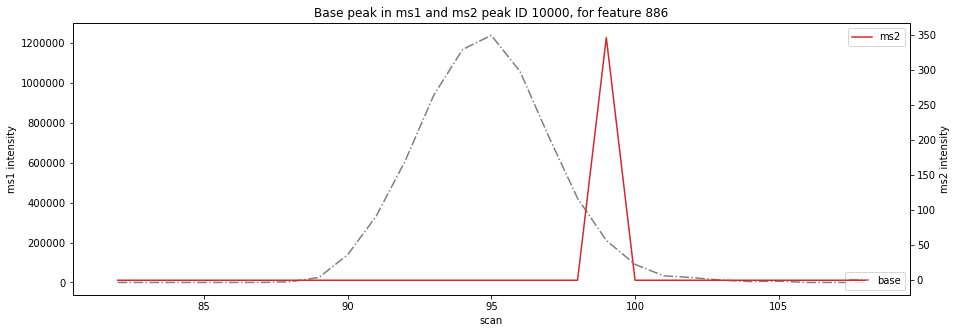

In [87]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1.plot(combined_df.scan, combined_df.intensity_base, marker='', linestyle='-.', ms=5, color='tab:gray', label='base')
ax2.plot(combined_df.scan, combined_df.intensity_ms2, marker='', linestyle='-', ms=5, color='tab:red', label='ms2')
ax2.legend(loc='upper right')
ax1.legend(loc='lower right')
ax1.set_ylabel('ms1 intensity')
ax1.set_xlabel('scan')
ax2.set_ylabel('ms2 intensity')
plt.title('Base peak in ms1 and ms2 peak ID {}, for feature {}'.format(ms2_peak_id, feature_id))
plt.margins(0.06)
plt.show()